## finite volumen
Wärmeleitungsgleichung
\begin{equation}
\frac{d}{d t} \big(c \rho T(x,t)\big) = \nabla \big( \lambda \nabla T \big) + \varphi(x,y,z,t)\\
\frac{d}{d t} \big(c \rho T(x,t)\big) = - \nabla \vec{q} + \varphi(x,y,z,t)
\end{equation}
Dann wird die Gleichung über ein Volumen $\Omega$ integriert und der Gauß-Integralsatz angewendet
\begin{align}
\int_\Omega c \rho \frac{\partial}{\partial t} T(x,t) d\Omega &= - \int_{\Omega} \nabla \vec{q} d\Omega + \int_\Omega \varphi(x,t) d\Omega \\
&= - \int_{\partial \Omega} \vec{q} d\vec{S} + \int_\Omega \varphi(x,t) d\Omega \\
\end{align}
Die simulierte Körper, auf denen die Differentialgleichung gelten soll, wird in kleine Zellen mit Volumina $\Omega_i$ aufgeteilt.
Die Integrale über $\Omega $ ersetzt man durch Mittelwerte über Volumina einer Zelle $ \overline{T}_i = \frac{1}{\Omega_i} \int_{\Omega_i} T d_\Omega $
\begin{equation}
c \rho \frac{\partial}{\partial t} \overline{T}(x,t) = - \frac{1}{\Omega_i} \int_{\partial \Omega} \vec{q} d\vec{S} + \overline{\varphi}(x,t)
\end{equation}



Im nicht stationären Fall müssen die Temperaturwerte am Anfang (t=0) vorgegeben sein. Dann wird aus Lösung des Gleichungssystems die Zeitableitung im Zeitschritt (t) erhalten, so dass mit dem Eulerverfahren der Nächste Zeitschritt (t+1) berechnet werden kann.
\begin{equation}
T_{t+1,i} =  T_{t,i} + \Delta t \cdot \frac{\partial T(t,i)}{\partial t} 
\end{equation}


## Formulierung eines 1D Beispiel-Problems

\begin{align}
\underbrace{\int_\Omega c \rho \frac{\partial}{\partial t} T(x,t) d\Omega}_{=0} &= - \int_{\partial \Omega} \vec{q} d\vec{S} + \int_\Omega \varphi(x,t) d\Omega \\
&= A \vec{q}\Big|_{x_a} - A \vec{q}\Big|_{x_b} + \int_\Omega \varphi(x,t) d\Omega \\
\end{align}

Knoten $x \in\{2m,4m,6m,8m\}$<br>
womit $L=2m$<br>
mit:
(Querschnittsfläche $A = 10 m^2$)<br>
Wärmeleitfähigkeit $\lambda = 5 \frac{W}{m K}$<br>
Wärmequelle-Dichte $\varphi = 10 \frac{W}{m^3}$<br>
folgt:

\begin{align}
\underbrace{\int_\Omega c \rho \frac{\partial}{\partial t} T(x,t) d\Omega}_{=0} &= A \vec{q}\Big|_{x_a} - A \vec{q}\Big|_{x_b} + \int_\Omega \varphi(x,t) d\Omega \\
&= A \vec{q}\Big|_{x_a} - A \vec{q}\Big|_{x_b} + \varphi A L \\
\end{align}

mit dem Fouriergesetz
\begin{align}
- \lambda \nabla T = \vec{q}
\end{align}

folgt:
\begin{align}
A \vec{q}\Big|_{x_b} - A \vec{q}\Big|_{x_a} &= \varphi A L \\
- A \lambda \nabla T \Big|_{x_b} + A \lambda \nabla T \Big|_{x_a} &= \varphi A L\\
- A \lambda \frac{T_{i+1}-T_{i}}{L} + A \lambda \frac{T_{i}-T_{i-1}}{L} &= \varphi A L\\
\end{align}

hinzu kommen Randbedingungen:<br>
Temperatur: $T(2m)=T_2=0°C$<br>
Wärmefluss: $q(8m)=q_8=15 \frac{W}{m^2}$<br>

so dass:
\begin{align}
- A \lambda \frac{T_{8}-T_{6}}{L} + A \lambda \frac{T_{6}-T_{4}}{L} &= \varphi A L\\
\Rightarrow q_8 + \lambda \frac{T_{6}-T_{4}}{L} &= \varphi L\\
\Rightarrow - 15 \frac{W}{m^2} + 5 \frac{W}{m K} \frac{T_{6}-T_{4}}{2m} &= 20 \frac{W}{m^2}\\
- A \lambda \frac{T_{6}-T_{4}}{L} + A \lambda \frac{T_{4}-T_{2}}{L} &= \varphi A L\\
\Rightarrow - 5 \frac{W}{m K} \frac{T_{6}-T_{4}}{2m} + 5 \frac{W}{m K} \frac{T_{4}-0°C}{2m} &= 20 \frac{W}{m^2}\\
\end{align}


in Matrixschreibweise:
\begin{equation}
\begin{pmatrix} 2 & -1 \\ -1 & 1 \end{pmatrix} \begin{pmatrix} T_4 \\ T_6 \end{pmatrix} = \begin{pmatrix} 8 \\ 14 \end{pmatrix}
\end{equation}

wobei
\begin{align}
q_8 &= \lambda \frac{T_{8}-T_{6}}{L} \\
\Rightarrow T_{8} &= \frac{q_8 L}{\lambda} + T_{6} \\
&= - 5°C + T_{6} \\
\end{align}


### Vergleich mit anderen Methoden

- Finite Differenzen: teilt das Volumen in Knoten ein und nähert Ableitungen durch Differenzen an Knotenpunkten um über die Randbedingungen die Werte an allen Knotenpunkten zu lösen
- Finite Elemente: teilt das Volumen in lokale Partitionen (Formfunktionen) ein, löst das Problem darauf und fügt das Ergebnis danach zusammen
- Finite Volumen: teilt das Volumen in kleine Volumina ein un berechnet über jedes Teilvolumina das Ergebnis

In [1]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [8]:
aa = np.array([[2,-1],[-1,1]])
bb = np.array([8,2])
solution = np.linalg.solve(aa,bb)

xx = [2,4,6,8]
solution = np.concatenate(([0],solution)) #T_0
solution = np.concatenate((solution,[solution[-1]-5])) #T_8

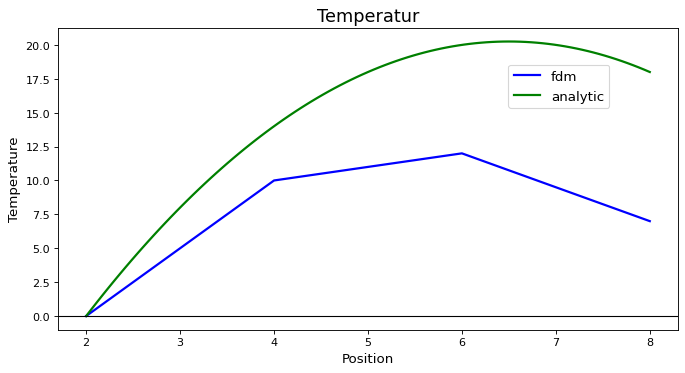

In [10]:
fig = plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
ax0=plt.subplot()
x=np.linspace(2,8,101)
ax0.plot(xx,solution,color="blue",label="fdm", linewidth=2, zorder=2)
ax0.plot(x,(-x**2+13*x-22),color="green",label="analytic", linewidth=2, zorder=2)
ax0.axhline(0, color='black', lw=1)
ax0.legend(fontsize=12, bbox_to_anchor=(0.9,0.9))
ax0.set_title('Temperatur', fontsize=16)
ax0.set_xlabel('Position', fontsize=12)
ax0.set_ylabel('Temperature', fontsize=12)
plt.show()

## mehr Stützstellen (N+1)

btw: in diesem Fall ist die Matrix (unter berücksichtigung der Gleichung für $T_2,T_8$  identisch zur matrix für das gleiche Beispielproblem für finite differenzen

=> somit ist im folgenden der gleiche code (für mehr Stützstellen) wie bei finiten Differenzen enthalten

In [11]:

N = 100
L = 6/(N-1)
aa = np.zeros((N,N))
aa[0,0:2] = [-2,1]
aa[N-1,N-2:N] = [1,-1]
for n in range(1,N-1):
    aa[n,n-1:n+2] = [1,-2,1]
bb = np.ones(N)*-2*L**2
bb[N-1] = 3*L
solution = np.linalg.solve(aa,bb)

xx = np.linspace(2,8,N+1)
solution = np.concatenate(([0],solution))

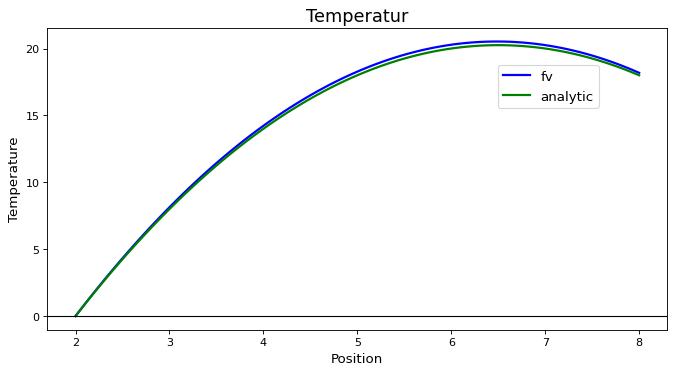

In [13]:
fig = plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
ax0=plt.subplot()
x=np.linspace(2,8,101)
ax0.plot(xx,solution,color="blue",label="fv", linewidth=2, zorder=2)
ax0.plot(x,(-x**2+13*x-22),color="green",label="analytic", linewidth=2, zorder=2)
ax0.axhline(0, color='black', lw=1)
ax0.legend(fontsize=12, bbox_to_anchor=(0.9,0.9))
ax0.set_title('Temperatur', fontsize=16)
ax0.set_xlabel('Position', fontsize=12)
ax0.set_ylabel('Temperature', fontsize=12)
plt.show()